# DATA PRE-PROCESSING

En este fichero se verá y explicará como se prr-procesaran los datos para poder usarlos después para la Neural Network.

## Data

Los datos que se usaran han sido extraidos de Kaggle. Estos datos representan los precios de casas en respecto con distintas propiedades de estas como el numero de metros cuadrados, numero de habitaciones, año de construcción, etc.
La idea principal es que ha partir de estas variables input, la red neuronal pueda predecir el valor (precio) de la casa que corresponde a la variable output. 

- El dataset utilizado esta disponible [aqui](https://www.kaggle.com/datasets/shree1992/housedata/data)

## Import Libraries and Download the Data

Primero, vamos a importar las librerias que vamos a usar a lo largo de este proyecto. Después, vamos a descargar el dataset [House price prediction](https://www.kaggle.com/datasets/shree1992/housedata/data) que se ha comentado anteriormente. 
Este dataset consta de 3 ficheros:
- output.csv
- data.csv (el que vamos a usar)
- data.dat

Los tres ficheros van a ser descargados en un directorio predeterminado, y este se va a guardar en la variable path para poder acceder posteriormente a los ficheros de datos.

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import plotly.express as px
import seaborn as sns
import os

# Download the dataset
path = kagglehub.dataset_download("shree1992/housedata")

Primero, vamos a leer los datos que hemos descargado, y que han sido guardados en el directorio que se encuentra en la variable `path`. Seguidamente, mostraremos las 5 primeras filas del DataFrame y las 5 ultimas. 

In [355]:
df = pd.read_csv(f'{path}/data.csv')
pd.set_option('display.max_columns', None)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## Primeras Observaciones de los Datos

Antes de empezar a modificar los datos, debemos observar los datos para entenderlos y poder tomar las mejores decisiones.

Primeramente, mostraremos la información basica de los datos usando el metodo de pandas `.info()`.

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Como podemos ver, nos muestra una lista de las distintas variables que encontramos en los datos, asi como la cantidad de valores de estas que son nulos y el tipo de variable que es. Podemos ver como a simple vista parece no haber valores nulos en este dataset, aun asi más adelante se analizara el DataFrame más a fondo para verificar si esto es cierto. En cuanto a los tipos de las variables, a continuación las clasificaremos en variables categoricas, numericas, textuales o complejas. 

In [357]:
numerical = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
others_type = [col for col in df.columns if df[col].dtype == 'object']

print(f"Numerical Variables: {numerical}")
print(f"Categorical, Textual and Complex Variables: {others_type}")

Numerical Variables: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical, Textual and Complex Variables: ['date', 'street', 'city', 'statezip', 'country']


| **VARIABLE** | date    | price     | bedrooms  | bathrooms | sqft_living | sqft_lot  | floors    | waterfront | view      | condition | sqft_above | sqft_basement | yr_build  | yr_renovated | 
|--------------|---------|-----------|-----------|-----------|-------------|-----------|-----------|------------|-----------|-----------|------------|---------------|-----------|--------------|
| **TYPE**     | complex | numerical | numerical | numerical | numerical   | numerical | numerical | numerical  | numerical | numerical | numerical  | numerical     | numerical | numerical    |

rest of the attributes...

| **VARIABLE** | street  | city    | statezip | country     |
|--------------|---------|---------|----------|-------------|
| **TYPE**     | textual | textual | textual  | categorical |


La tabla anterior permite ver de forma clara los tipos de variables que hay en los datos. 

Ahora que ya hemos clasificado los tipos de las variables, vamos a comprovar el numero de valores nulos que hay para cada variable. 

In [358]:
null_values = df.isnull().sum()

print(f"Null Values: \n{null_values}")

Null Values: 
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Como podemos ver nuevamente, hemos confirmado que este dataset no contiene valores nulos lo que nos facilita el trabajo de pre-procesamiento de los datos. 

Ahora vamos a mirar si hay patterns duplicados en los datos.

In [359]:
duplicated = df.duplicated().sum()

print(f"Duplicated Rows: {duplicated}")

Duplicated Rows: 0


Como podemos observar, tampoco hay patterns duplicados en este dataset.

## Analize the Data

En este apartado vamos a analizar los datos para realizar el pre-procesamiento que sea necesario.

Los pasos que vamos a seguir van a ser los siguientes:
1. Determinar si alguna columna se puede eliminar por no aportar información que nos resulte necesaria para hacer la predicción
2. Detectar los outliers de las distintas columnas
3. Eliminar los outliers
4. Transformar variables categoricas a numericas

Primero, empezaremos observando la información basica de los datos con el metodo `.describe()` de pandas.

In [360]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Como podemos ver, en algunas de las variables ya se puede apreciar como habra algunos outliers. Esto lo podemos ver observando la media y el valor maximo de esa variable.
Por ejemplo, con la variable price podemos ver como la media esta en `5.519630e+05`, mientras que el valor maximo es ``2.659000e+07``. En este caso se aprecia claramente como suguramente el valor ``2.659000e+07`` sea un outlier, ya que la media esta muy por debajo de este (teniendo en cuenta que la media es sensible a los outliers).

### 1. Eliminación de Columnas "Irrelevantes"

En este apartado vamos a observar que columnas pueden no ser relevantes en la predicción del precio de la vivienda. Empezaremos analizando las columnas que no son del tipo numerico.

In [361]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [362]:
df['street'].value_counts()

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
                        ..
501 N 143rd St           1
14855 SE 10th Pl         1
759 Ilwaco Pl NE         1
5148 S Creston St        1
10915 243rd Ave NE       1
Name: count, Length: 4525, dtype: int64

In [363]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [364]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

En los resultados de las dos celdas anteriores podemos ver dos casos muy interesantes. 

En el primer caso, podemos ver como la columna `country` siempre tiene el mismo valor, por lo que la podemos eliminar, ya que no aporta información adicional.

En el segundo caso podemos ver un caso totalmente contarrio, la columna `street` tiene muchos valores distintos, y como ademas se trata de un tipo de dato textual, hacer la transformación a un tipo numericon con tantos valores es muy complicado, por lo que tomamos la decision de eliminarla.

Además, la columna `date` tampoco parece aportar tener relación con los atributos de la vivienda, por lo que no nos ayuda a predecir el precio de esta, asi que también la eliminaremos.

**Asi entonces, hemos decidido que vamos a eliminar las siguientes columnas:**
- **country**
- **street**
- **date**
- **statezip**

A continuación, vamos a eliminar las columnas comentadas anteriormnete para continuar analizando los datos. 

In [365]:
df1 = df.drop(['country', 'street', 'statezip', 'date'], axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


### 2. Detectar Outliers

Una forma de detectar los outliers es visualizar los datos, ya que en los distintos plots se pueden observar si hay valores que se salen de la media. 

In [366]:
fig = px.histogram(df1, x='price', title='Price Distribution')
fig.show()

In [367]:
price_skewness = df1['price'].skew()
price_kurtosis = df1['price'].kurt()

print(f"Price Skewness: {price_skewness}")
print(f"Price Kurtosis: {price_kurtosis}")

Price Skewness: 24.790932561757053
Price Kurtosis: 1044.3521511267897


In [368]:
fig = px.scatter(df1, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

In [369]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['price'])
print("Number of Outliers: "+ str(len(outliers)))
print("Max Value Outlier: "+ str(outliers.max()))
print("Min Value Outlier: "+ str(outliers.min()))
outliers

Number of Outliers: 240
Max Value Outlier: 26590000.0
Min Value Outlier: 1157200.0


1       2.384000e+06
11      1.400000e+06
14      1.200000e+06
99      1.395000e+06
122     2.280000e+06
            ...     
4348    2.199900e+06
4350    2.659000e+07
4465    2.560498e+06
4467    1.337044e+06
4572    1.288333e+06
Name: price, Length: 240, dtype: float64

In [370]:
df2 = df1.drop(outliers.index)
df2.shape

(4360, 14)

In [371]:
df2['price'].skew()
df2['price'].kurt()

fig = px.scatter(df2, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

Ahora podemos ver como ya no hay esos valores outliers, pero podemos ver como hay anomalias, como el hecho de que el precio sea 0 en algunos casos. Esto no tiene sentido, asi que tendremos que eliminar los patterns donde el precio sea igual a 0. 

In [372]:
df3 = df2[df2['price']!=0]
df3.shape

(4311, 14)

In [373]:
fig = px.histogram(df3, x='price', title='Price Distribution')
fig.show()

In [374]:
fig = px.scatter(df3, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

In [375]:
outliers = find_outliers_IQR(df3['sqft_living'])
print("Number of Outliers: "+ str(len(outliers)))
print("Max Value Outlier: "+ str(outliers.max()))
print("Min Value Outlier: "+ str(outliers.min()))
outliers

Number of Outliers: 73
Max Value Outlier: 7320
Min Value Outlier: 4140


107     4340
143     4420
148     4490
233     4460
388     4230
        ... 
4398    5340
4400    5010
4428    4260
4432    5960
4545    4230
Name: sqft_living, Length: 73, dtype: int64

In [376]:
df4 = df3.drop(outliers.index)
df4.shape

(4238, 14)

In [377]:
fig = px.scatter(df4, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

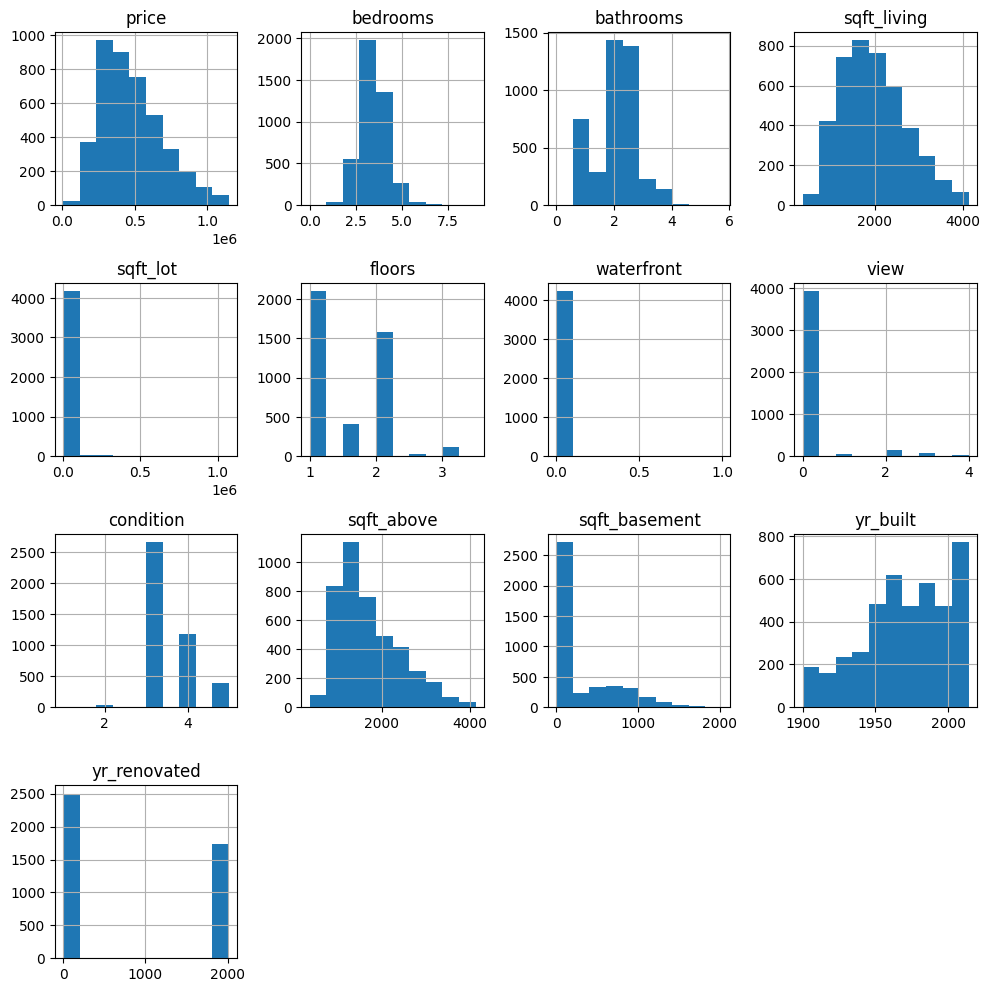

In [379]:
df4.hist(figsize=(10, 10))
plt.tight_layout(pad=1.0) 
plt.show()

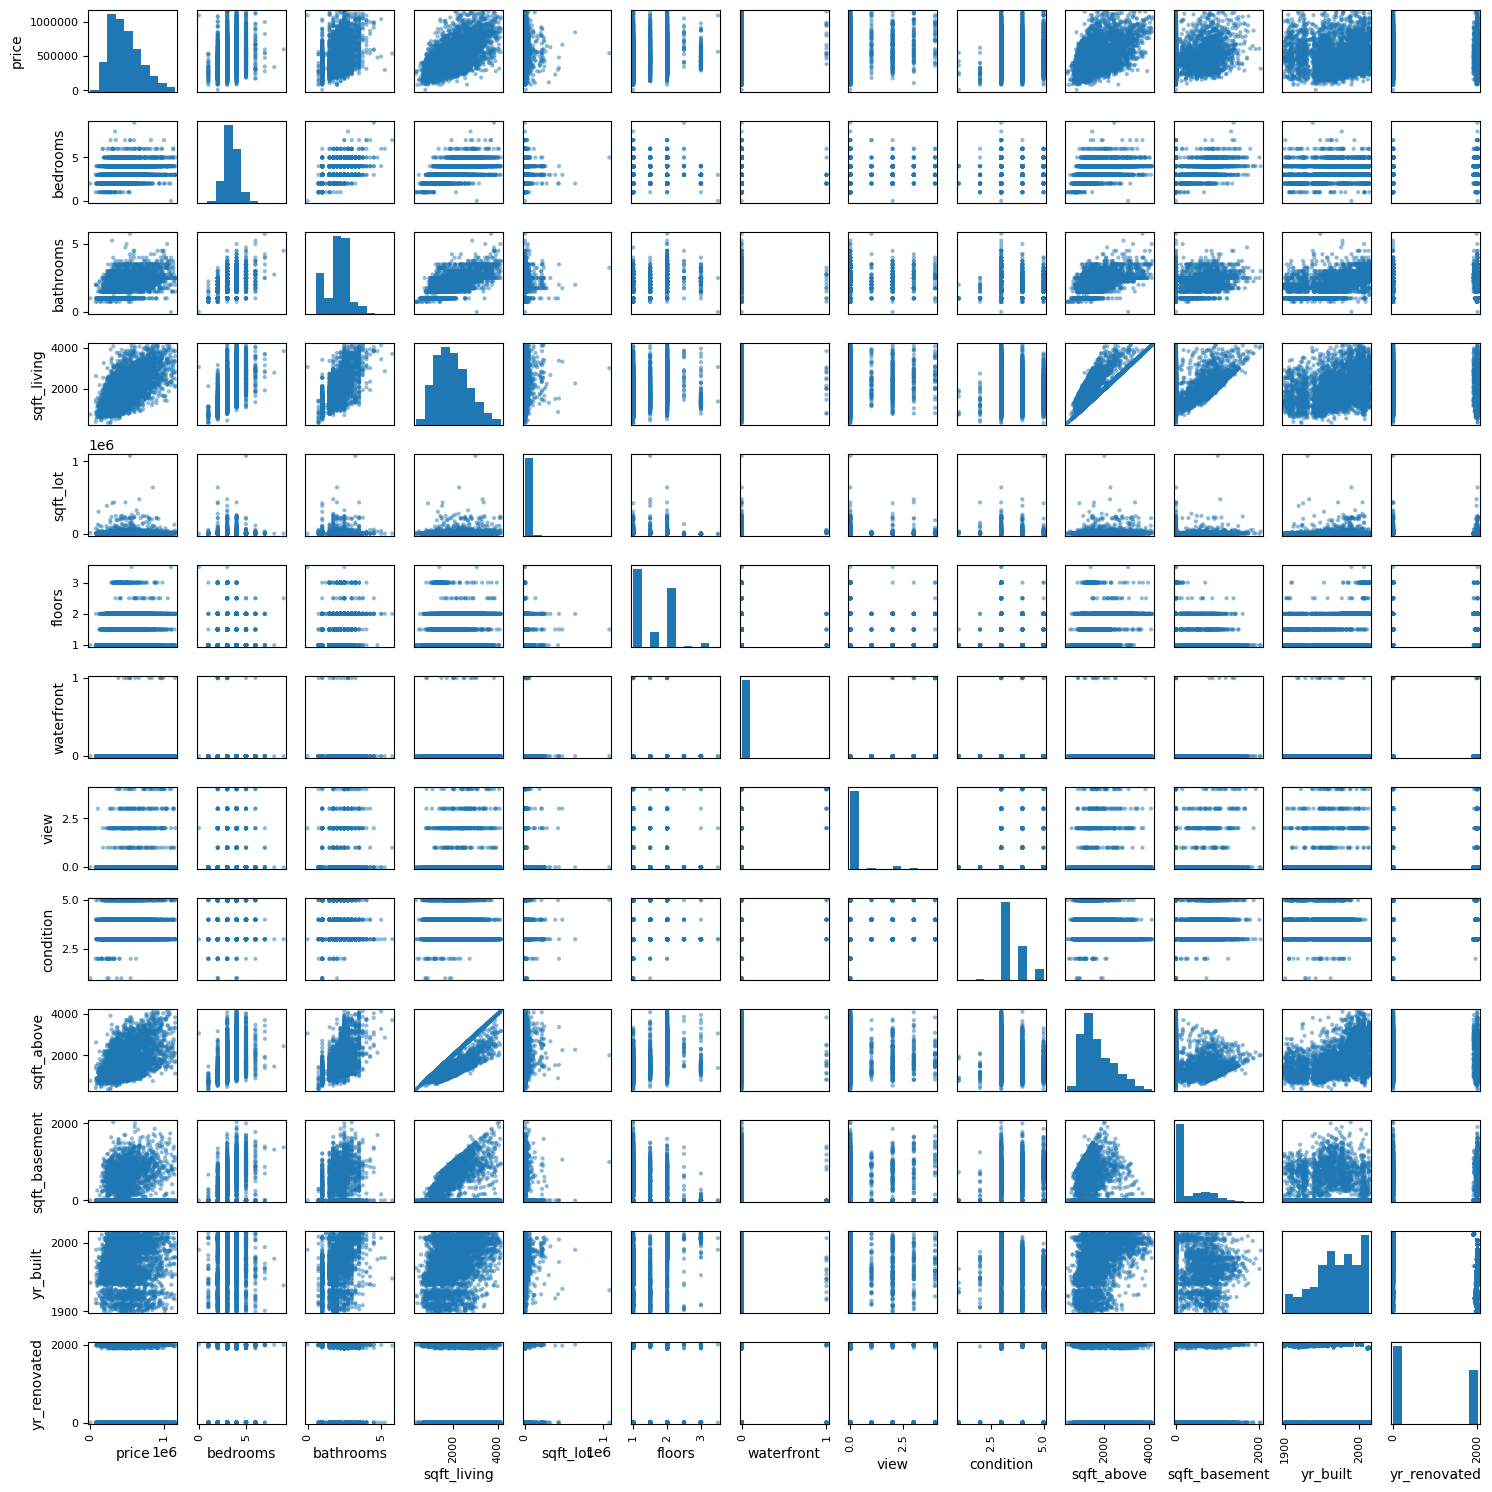

In [380]:
pd.plotting.scatter_matrix(df4, figsize=(15, 15))
plt.tight_layout(pad=1.0)
plt.show()

In [381]:
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle


In [382]:
df4['property_age'] = 2024 - df4['yr_built']
df4['effective_age'] = 2024 - np.where(df4['yr_renovated'] > 0, df4['yr_renovated'], df4['yr_built'])
df4['price_per_sqft'] = df4['price'] / df4['sqft_living']

In [383]:
#log_transform_cols = ['price', 'price_per_sqft']

#df4[log_transform_cols] = df4[log_transform_cols].map(lambda x: np.log1p(x) if x > 0 else 0)

df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,property_age,effective_age,price_per_sqft
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,69,19,233.582090
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,58,58,177.202073
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,61,61,210.000000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,48,32,283.505155
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle,86,30,556.818182


In [384]:
def min_max_scaling(column, min_value=None, max_value=None):
    if min_value is None:
        min_value = column.min()
    if max_value is None:
        max_value = column.max()
    return (column - min_value) / (max_value - min_value) + 0.1


min_max_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'property_age', 'effective_age', 'price_per_sqft', 'price']

for col in min_max_col:
    df4[col] = min_max_scaling(df4[col])


df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,property_age,effective_age,price_per_sqft
0,0.367204,0.433333,0.360870,0.357979,0.106775,0.3,0,0,3,0.357979,0.100000,0.582456,1.095531,Shoreline,0.617544,0.178947,0.403802
2,0.392593,0.433333,0.447826,0.514894,0.110534,0.1,0,0,4,0.514894,0.100000,0.678947,0.100000,Kent,0.521053,0.521053,0.327193
3,0.460883,0.433333,0.491304,0.533511,0.106885,0.1,0,0,4,0.267553,0.592611,0.652632,0.100000,Bellevue,0.547368,0.547368,0.371759
4,0.574698,0.544444,0.534783,0.517553,0.109186,0.1,0,0,4,0.304787,0.494089,0.766667,1.089076,Redmond,0.433333,0.292982,0.471638
5,0.522168,0.322222,0.273913,0.235638,0.105348,0.1,0,0,3,0.235638,0.100000,0.433333,1.090070,Seattle,0.766667,0.275439,0.843014


In [385]:
city_target_mean = df4.groupby('city')['price'].mean()
df4['city_encoded'] = df4['city'].map(city_target_mean)

df4.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,property_age,effective_age,price_per_sqft,city_encoded
0,0.367204,0.433333,0.360870,0.357979,0.106775,0.3,0,0,3,0.357979,0.100000,0.582456,1.095531,Shoreline,0.617544,0.178947,0.403802,0.437268
2,0.392593,0.433333,0.447826,0.514894,0.110534,0.1,0,0,4,0.514894,0.100000,0.678947,0.100000,Kent,0.521053,0.521053,0.327193,0.354942
3,0.460883,0.433333,0.491304,0.533511,0.106885,0.1,0,0,4,0.267553,0.592611,0.652632,0.100000,Bellevue,0.547368,0.547368,0.371759,0.687197
4,0.574698,0.544444,0.534783,0.517553,0.109186,0.1,0,0,4,0.304787,0.494089,0.766667,1.089076,Redmond,0.433333,0.292982,0.471638,0.645022
5,0.522168,0.322222,0.273913,0.235638,0.105348,0.1,0,0,3,0.235638,0.100000,0.433333,1.090070,Seattle,0.766667,0.275439,0.843014,0.538701


In [386]:
df5 = df4.drop(columns=['city'])
df5 = df5.drop(columns=['waterfront', 'view'])

df5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,property_age,effective_age,price_per_sqft,city_encoded
0,0.367204,0.433333,0.360870,0.357979,0.106775,0.3,3,0.357979,0.100000,0.582456,1.095531,0.617544,0.178947,0.403802,0.437268
2,0.392593,0.433333,0.447826,0.514894,0.110534,0.1,4,0.514894,0.100000,0.678947,0.100000,0.521053,0.521053,0.327193,0.354942
3,0.460883,0.433333,0.491304,0.533511,0.106885,0.1,4,0.267553,0.592611,0.652632,0.100000,0.547368,0.547368,0.371759,0.687197
4,0.574698,0.544444,0.534783,0.517553,0.109186,0.1,4,0.304787,0.494089,0.766667,1.089076,0.433333,0.292982,0.471638,0.645022
5,0.522168,0.322222,0.273913,0.235638,0.105348,0.1,3,0.235638,0.100000,0.433333,1.090070,0.766667,0.275439,0.843014,0.538701


<Axes: >

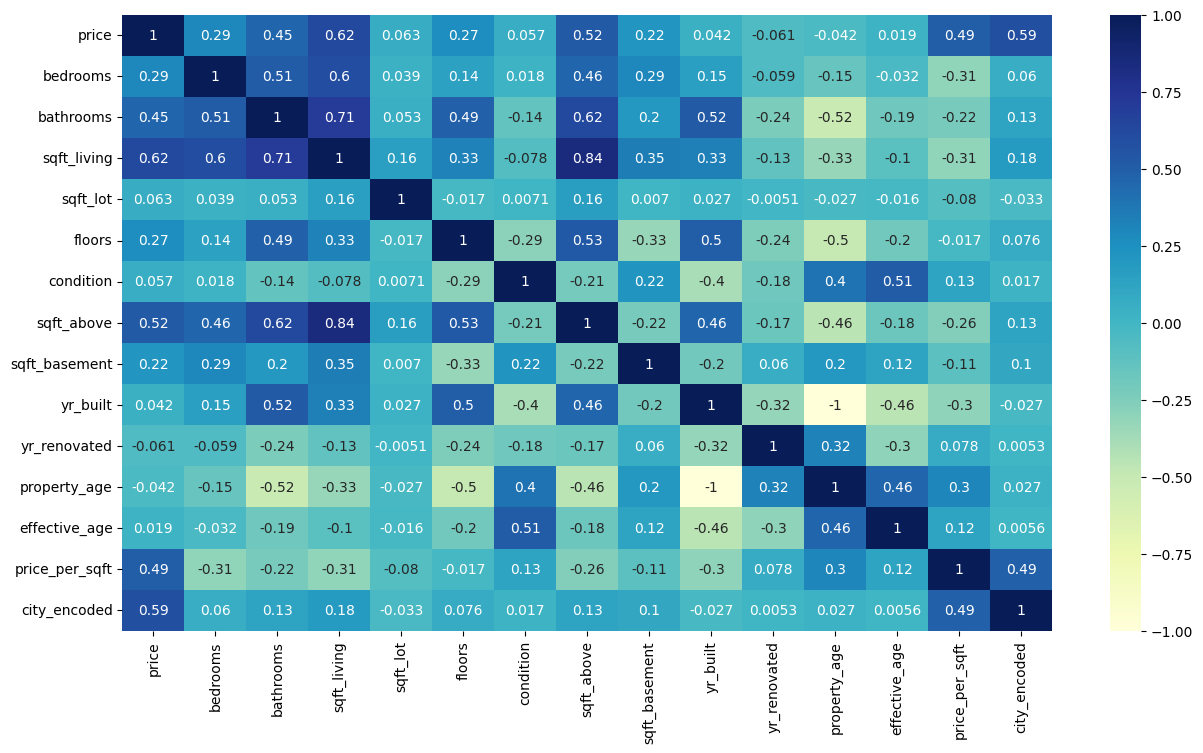

In [387]:
plt.figure(figsize=(15, 8))
sns.heatmap(df5.select_dtypes('number').corr(), annot=True, cmap="YlGnBu")

In [388]:
df5.to_csv('./data/processed_data.csv', index=False)

In [389]:
df5_shuffled = df5.sample(frac=1, random_state=42).reset_index(drop=True)

X = df5_shuffled.drop(columns=['price'])
y = df5_shuffled['price']

train_size = int(len(df5_shuffled) * 0.8)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]


X_train.to_csv('./data/X_train.csv', index=False)
y_train.to_csv('./data/y_train.csv', index=False)
X_test.to_csv('./data/X_test.csv', index=False)
y_test.to_csv('./data/y_test.csv', index=False)
